# Group Work Submission 2: Clustering, CART & SVM

Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib import dates
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pp
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification, classification_report, confusion_matrix
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from kneed import KneeLocator
from sklearn import tree
from arch import arch_model
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

C:\Users\MyLenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Importing**

Re-import the data from the csv file

In [2]:
df = pd.read_csv('MScFE 650 MLF GWP Data.csv', index_col=0) 
df

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,988.345,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,11122.05,...,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
2-Oct-20,1037.211,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,11389.27,...,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
9-Oct-20,1075.670,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,11779.71,...,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62


**Average Data Summaries**

Summarize the levels of the series, using 3 methods

* We calculate using the prices here.

Calculate the mean of each series

In [3]:
mean = df.mean()
mean

LUXXX                      1457.231905
MSCI ARGENTINA             2526.652262
BLP ORIENTE MEDIO          3029.482978
MSCI AUSTRALIA             1183.940159
MSCI AUSTRIA                127.418889
MSCI BELGIUM                 91.290238
MSCI BRAZIL                1813.989167
MSCI CANADA                1970.821627
MSCI CHINA                   76.788214
MSCI DENMARK               8447.657738
MSCI EM ASIA                509.413056
MSCI EM EU-MIDE-AFRICA      247.079409
MSCI EM EUROPE              304.084643
MSCI EM LATIN AMERICA      2502.462738
MSCI FINLAND                121.925278
MSCI FRANCE                 145.765476
MSCI GERMANY                143.522897
MSCI HONG KONG            14216.931151
MSCI INDIA                 1187.467976
MSCI ITALY                   55.799127
MSCI JAPAN                  943.752143
MSCI KOREA                  647.381905
MSCI MEXICO                4875.085000
MSCI NETHERLANDS            141.988175
MSCI NEW ZEALAND            145.904444
MSCI NORWAY              

Calculate the trimmed mean of each series, where trim = 5%

In [4]:
trimm = stats.trim_mean(df, 0.05)
trimm_005 = pd.DataFrame(trimm, index=df.columns)
trimm_005

,0
LUXXX,1467.800623
MSCI ARGENTINA,2510.848070
BLP ORIENTE MEDIO,3054.058247
MSCI AUSTRALIA,1183.276053
MSCI AUSTRIA,127.519298
MSCI BELGIUM,92.043772
MSCI BRAZIL,1829.172982
MSCI CANADA,1977.830351
MSCI CHINA,76.861930
MSCI DENMARK,8378.563026


Calculate the trimmed mean of each series, where trim = 50%.  This is also called the median

In [5]:
trim_05 = df.median()
trim_05

LUXXX                      1491.08100
MSCI ARGENTINA             2541.97500
BLP ORIENTE MEDIO          3113.41405
MSCI AUSTRALIA             1177.37500
MSCI AUSTRIA                130.63500
MSCI BELGIUM                 95.01500
MSCI BRAZIL                1860.96000
MSCI CANADA                1990.63000
MSCI CHINA                   78.71000
MSCI DENMARK               8227.80500
MSCI EM ASIA                517.31000
MSCI EM EU-MIDE-AFRICA      251.16550
MSCI EM EUROPE              306.43000
MSCI EM LATIN AMERICA      2598.95500
MSCI FINLAND                124.12000
MSCI FRANCE                 147.93000
MSCI GERMANY                144.64500
MSCI HONG KONG            14342.61000
MSCI INDIA                 1230.79000
MSCI ITALY                   55.96000
MSCI JAPAN                  953.66000
MSCI KOREA                  649.64000
MSCI MEXICO                4948.77000
MSCI NETHERLANDS            143.67500
MSCI NEW ZEALAND            135.85000
MSCI NORWAY                2795.26500
MSCI PERU   

Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

* We apply:
    * 50% for the mean series,
    * 25% for the median series,
    * 25% for the 5% trimmed series. 

Rank the series, from highest expected return to lowest expected return using your weighted factor

* Mean of percentage change of each series, where trim = 5%

In [6]:
trimm_weight = stats.trim_mean(df.pct_change(), 0.05)
trimm_weight_df = pd.Series(trimm_weight, index=df.columns)

* We sum the return of each method with our assined weights so we get a single number, so we can rank them highest expected return to lowest expected return:

In [7]:
avg_returns = trimm_weight_df*0.25 + df.pct_change().mean()*0.5 + df.pct_change().median()*0.25

In [8]:
avg_returns.sort_values(ascending=False)

MSCI RUSSIA               0.003423
MSCI CHINA                0.003235
MSCI USA                  0.003137
MSCI BRAZIL               0.003087
MSCI NEW ZEALAND          0.002772
MSCI PERU                 0.002696
MSCI DENMARK              0.002677
MSCI EM ASIA              0.002580
MSCI INDIA                0.002485
MSCI NETHERLANDS          0.002418
MSCI KOREA                0.002046
MSCI SWEDEN               0.001905
MSCI CANADA               0.001815
MSCI EM LATIN AMERICA     0.001771
MSCI HONG KONG            0.001684
MSCI SWITZERLAND          0.001612
MSCI FRANCE               0.001537
MSCI AUSTRALIA            0.001351
MSCI EM EUROPE            0.001346
MSCI JAPAN                0.001250
MSCI NORWAY               0.001222
MSCI GERMANY              0.001196
MSCI ARGENTINA            0.001193
MSCI FINLAND              0.001100
MSCI EM EU-MIDE-AFRICA    0.000963
MSCI UK                   0.000540
MSCI SOUTH AFRICA         0.000529
MSCI ITALY                0.000258
MSCI AUSTRIA        

**Volatility Data Summaries**

Summarize the data series, using 3 methods

* Log retunrs of the 35 series:

In [9]:
lg_return = np.log(df) - np.log(df.shift(1))

For the log return series, compute a EWMA

In [10]:
lg_return.dropna().ewm(span=30).mean().abs()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
8-Jan-16,0.074195,0.049800,0.072093,0.060983,0.088529,0.058924,0.084769,0.047457,0.084889,0.045825,...,0.071515,0.077926,0.042086,0.047642,0.064119,0.070708,0.069404,0.065744,0.054471,0.062333
15-Jan-16,0.049722,0.034073,0.061071,0.039949,0.065059,0.039146,0.067341,0.037841,0.071112,0.049856,...,0.061883,0.059341,0.081921,0.046811,0.050681,0.053246,0.051127,0.041129,0.035277,0.042204
22-Jan-16,0.032858,0.011752,0.060888,0.025559,0.033454,0.012965,0.053543,0.015031,0.048514,0.019501,...,0.026871,0.025739,0.029785,0.036148,0.024348,0.027531,0.018129,0.019665,0.017057,0.022338
29-Jan-16,0.014288,0.012429,0.026034,0.013067,0.020977,0.003118,0.014851,0.001181,0.029917,0.008175,...,0.014277,0.009163,0.002456,0.021122,0.000529,0.017594,0.014100,0.011524,0.003715,0.011700
5-Feb-16,0.015213,0.011141,0.013217,0.011147,0.022197,0.017988,0.005936,0.002608,0.028632,0.024207,...,0.010040,0.009312,0.005562,0.015687,0.000102,0.021622,0.014694,0.018531,0.011697,0.016456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,0.003348,0.001820,0.001562,0.000337,0.008680,0.004931,0.005523,0.000631,0.003455,0.005319,...,0.001615,0.003590,0.007008,0.004439,0.001797,0.006945,0.003188,0.000842,0.004020,0.003233
2-Oct-20,0.000019,0.004132,0.001846,0.002481,0.008166,0.003260,0.007918,0.001009,0.004859,0.006508,...,0.001088,0.002818,0.007902,0.003385,0.000248,0.005259,0.004143,0.001104,0.003110,0.004070
9-Oct-20,0.002332,0.008458,0.000247,0.000959,0.003861,0.000145,0.003608,0.002350,0.007045,0.008262,...,0.000162,0.000479,0.006187,0.002453,0.000997,0.002957,0.004980,0.001368,0.001775,0.006280


For the log series, run a GARCH(1,1) model for each of the 35 series:
* We choose to run EGARCH(1,1) as it`s better for equities.

* Log returns:

In [11]:
garchlog = lg_return.dropna()

* Fitting 35 EGARCH model:

In [12]:
var_parameters = []
for index in garchlog:
    GARCH = arch_model(garchlog[index], mean="Constant", vol="EGARCH", p=1, q = 1)
    GARCHresult = GARCH.fit()
    var_parameters.append(GARCHresult.params)
    print(GARCHresult.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42970.55418401069
Iteration:      2,   Func. Count:     18,   Neg. LLF: 66.65236862731547
Iteration:      3,   Func. Count:     27,   Neg. LLF: 88629130.52272929
Iteration:      4,   Func. Count:     36,   Neg. LLF: -260.8157610252046
Iteration:      5,   Func. Count:     42,   Neg. LLF: -518.955982136314
Iteration:      6,   Func. Count:     47,   Neg. LLF: -519.0147561549127
Iteration:      7,   Func. Count:     52,   Neg. LLF: -519.0828845174585
Iteration:      8,   Func. Count:     57,   Neg. LLF: -519.0893616657949
Iteration:      9,   Func. Count:     62,   Neg. LLF: -519.0901824188
Iteration:     10,   Func. Count:     67,   Neg. LLF: -519.090906565121
Iteration:     11,   Func. Count:     72,   Neg. LLF: -519.0914169982511
Iteration:     12,   Func. Count:     77,   Neg. LLF: -519.0916400688052
Iteration:     13,   Func. Count:     82,   Neg. LLF: -519.0916745521157
Iteration:     14,   Func. Count:     87,   Neg. LLF: -519.

Covariance estimator: robust
Iteration:      1,   Func. Count:      6,   Neg. LLF: 194541645596896.62
Iteration:      2,   Func. Count:     17,   Neg. LLF: 941535284.816757
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2939649112.6310863
Iteration:      4,   Func. Count:     33,   Neg. LLF: -439.61333722404527
Iteration:      5,   Func. Count:     39,   Neg. LLF: -549.723832969238
Iteration:      6,   Func. Count:     44,   Neg. LLF: -549.8331416865083
Iteration:      7,   Func. Count:     49,   Neg. LLF: -549.8612630127435
Iteration:      8,   Func. Count:     54,   Neg. LLF: -549.8749608402459
Iteration:      9,   Func. Count:     59,   Neg. LLF: -549.8794736856346
Iteration:     10,   Func. Count:     64,   Neg. LLF: -549.8797489119081
Iteration:     11,   Func. Count:     69,   Neg. LLF: -549.6764103712969
Iteration:     12,   Func. Count:     76,   Neg. LLF: -549.8801384494152
Iteration:     13,   Func. Count:     81,   Neg. LLF: -549.880255646168
Iteration:     14,   Func

Covariance estimator: robust
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7521010148299.733
Iteration:      2,   Func. Count:     17,   Neg. LLF: 206333541.01718736
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5282807831.037163
Iteration:      4,   Func. Count:     33,   Neg. LLF: -491.90610289872734
Iteration:      5,   Func. Count:     40,   Neg. LLF: -535.9382322200422
Iteration:      6,   Func. Count:     45,   Neg. LLF: -536.1954181446256
Iteration:      7,   Func. Count:     50,   Neg. LLF: -536.2078510155908
Iteration:      8,   Func. Count:     55,   Neg. LLF: -536.20828205296
Iteration:      9,   Func. Count:     60,   Neg. LLF: -536.2083498260581
Iteration:     10,   Func. Count:     65,   Neg. LLF: -536.2083774165617
Iteration:     11,   Func. Count:     69,   Neg. LLF: -536.2083774164973
Optimization terminated successfully    (Exit mode 0)
            Current function value: -536.2083774165617
            Iterations: 11
            Function evaluations: 6

Covariance estimator: robust
Iteration:      1,   Func. Count:      6,   Neg. LLF: 186366654134178.2
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5099562819.997125
Iteration:      3,   Func. Count:     25,   Neg. LLF: 13326.593412238994
Iteration:      4,   Func. Count:     33,   Neg. LLF: -503.0401754198816
Iteration:      5,   Func. Count:     40,   Neg. LLF: -585.1962844274163
Iteration:      6,   Func. Count:     46,   Neg. LLF: -588.2846435868339
Iteration:      7,   Func. Count:     51,   Neg. LLF: -588.3135280447655
Iteration:      8,   Func. Count:     56,   Neg. LLF: -588.3138757087984
Iteration:      9,   Func. Count:     61,   Neg. LLF: -588.3138767409678
Iteration:     10,   Func. Count:     65,   Neg. LLF: -588.3138767402768
Optimization terminated successfully    (Exit mode 0)
            Current function value: -588.3138767409678
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10
                     Constant Mea

Iteration:      2,   Func. Count:     18,   Neg. LLF: 1170.6227481316228
Iteration:      3,   Func. Count:     27,   Neg. LLF: 603823521930.6721
Iteration:      4,   Func. Count:     37,   Neg. LLF: -577.0192175782412
Iteration:      5,   Func. Count:     45,   Neg. LLF: -597.1680641492377
Iteration:      6,   Func. Count:     50,   Neg. LLF: -597.2106970699149
Iteration:      7,   Func. Count:     55,   Neg. LLF: -597.2286234808702
Iteration:      8,   Func. Count:     60,   Neg. LLF: -597.2388937233912
Iteration:      9,   Func. Count:     65,   Neg. LLF: -597.2416329957961
Iteration:     10,   Func. Count:     70,   Neg. LLF: -597.2418751256669
Iteration:     11,   Func. Count:     75,   Neg. LLF: -597.2419554735897
Iteration:     12,   Func. Count:     80,   Neg. LLF: -597.2420079251934
Iteration:     13,   Func. Count:     85,   Neg. LLF: -597.2420099790337
Iteration:     14,   Func. Count:     89,   Neg. LLF: -597.2420099787232
Optimization terminated successfully    (Exit mode 0

Iteration:      8,   Func. Count:     54,   Neg. LLF: -616.4175249348821
Optimization terminated successfully    (Exit mode 0)
            Current function value: -616.4175249346652
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:       MSCI NEW ZEALAND   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                616.418
Distribution:                  Normal   AIC:                          -1224.84
Method:            Maximum Likelihood   BIC:                          -1210.73
                                        No. Observations:                  251
Date:                Sun, Jan 02 2022   Df Residuals:                      250
Time:                        23:08:42   Df Model:                            1
        

Iteration:      6,   Func. Count:     46,   Neg. LLF: -619.6983802343002
Iteration:      7,   Func. Count:     51,   Neg. LLF: -619.7352246929172
Iteration:      8,   Func. Count:     56,   Neg. LLF: -619.7359323741159
Iteration:      9,   Func. Count:     61,   Neg. LLF: -619.7359410638671
Iteration:     10,   Func. Count:     65,   Neg. LLF: -619.7359410644814
Optimization terminated successfully    (Exit mode 0)
            Current function value: -619.7359410638671
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:         MSCI SINGAPORE   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                619.736
Distribution:                  Normal   AIC:                          -1231.47
Method:            Maximum Lik

Iteration:      1,   Func. Count:      6,   Neg. LLF: 519677437321126.9
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1031694216.3880315
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2771765161.4589148
Iteration:      4,   Func. Count:     33,   Neg. LLF: -588.3627916139756
Iteration:      5,   Func. Count:     40,   Neg. LLF: -636.2465380030321
Iteration:      6,   Func. Count:     46,   Neg. LLF: -637.3905560210478
Iteration:      7,   Func. Count:     51,   Neg. LLF: -637.3981225508423
Iteration:      8,   Func. Count:     56,   Neg. LLF: -637.3996688320954
Iteration:      9,   Func. Count:     61,   Neg. LLF: -637.4002899901327
Iteration:     10,   Func. Count:     66,   Neg. LLF: -637.4002948862095
Iteration:     11,   Func. Count:     70,   Neg. LLF: -637.4002948866786
Optimization terminated successfully    (Exit mode 0)
            Current function value: -637.4002948862095
            Iterations: 11
            Function evaluations: 70
            Gradient eval

Covariance estimator: robust


* We need to get only omega, alpha & beta values to calculate the unconditional volatility of each series:

In [13]:
var_array = np.array(var_parameters)
var_array_remove_mu = np.delete(var_array, 0, axis=1)
coef_values = pd.DataFrame(var_array_remove_mu, columns=['omega', 'alpha', 'beta'], index=df.columns)

* Unconditional volatility =  ω/(1−α−β)

In [14]:
unconditional_volatility_ = coef_values['omega']/(1-coef_values['alpha']-coef_values['beta'])

In [15]:
unconditional_volatility_

LUXXX                      2.596313
MSCI ARGENTINA             2.860988
BLP ORIENTE MEDIO          0.662176
MSCI AUSTRALIA             4.479636
MSCI AUSTRIA               2.383767
MSCI BELGIUM               3.681304
MSCI BRAZIL                4.626151
MSCI CANADA                2.469879
MSCI CHINA                14.341874
MSCI DENMARK               3.026417
MSCI EM ASIA               6.342647
MSCI EM EU-MIDE-AFRICA     4.378073
MSCI EM EUROPE             3.540062
MSCI EM LATIN AMERICA      4.474867
MSCI FINLAND               2.322428
MSCI FRANCE                2.502960
MSCI GERMANY               2.317074
MSCI HONG KONG             1.800543
MSCI INDIA                 4.064974
MSCI ITALY                 1.944441
MSCI JAPAN                 2.166058
MSCI KOREA                 2.818656
MSCI MEXICO                3.067687
MSCI NETHERLANDS           1.972398
MSCI NEW ZEALAND           3.964633
MSCI NORWAY                5.029369
MSCI PERU                  2.077131
MSCI RUSSIA                3

For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

In [16]:
df_range = (df.rolling(window=21).max()-df.rolling(window=21).min()).dropna()
normalizer = Normalizer()
new = normalizer.fit_transform(df_range.T)
hlrange = pd.DataFrame(new,index=df.columns)
vrange=hlrange.T.std()*100

In [17]:
vrange

LUXXX                     2.992346
MSCI ARGENTINA            2.940726
BLP ORIENTE MEDIO         3.321256
MSCI AUSTRALIA            3.964755
MSCI AUSTRIA              2.801970
MSCI BELGIUM              3.255064
MSCI BRAZIL               2.771201
MSCI CANADA               4.044787
MSCI CHINA                2.021819
MSCI DENMARK              3.137145
MSCI EM ASIA              2.323798
MSCI EM EU-MIDE-AFRICA    3.110998
MSCI EM EUROPE            3.629377
MSCI EM LATIN AMERICA     3.136792
MSCI FINLAND              3.455532
MSCI FRANCE               3.607616
MSCI GERMANY              3.337645
MSCI HONG KONG            2.163806
MSCI INDIA                3.403255
MSCI ITALY                3.119073
MSCI JAPAN                2.573586
MSCI KOREA                2.957127
MSCI MEXICO               2.654929
MSCI NETHERLANDS          3.619440
MSCI NEW ZEALAND          2.705252
MSCI NORWAY               3.368674
MSCI PERU                 2.954722
MSCI RUSSIA               3.510254
MSCI SINGAPORE      

Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

* We apply:
    * 50% for the GARCH method,
    * 25% for the EWMA method,
    * 25% for the 1-month range method.

Rank the series, from highest volatility to lowest volatility using your weighted factor.  For GARCH, use the unconditional variance as the average.  For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model.

In [18]:
avg_vol=(vrange*0.25)+(lg_return.dropna().ewm(span=30).mean().sum(axis=0)*0.25*-1+unconditional_volatility_*0.5)

In [19]:
avg_vol.sort_values(ascending=False)

MSCI CHINA                7.630819
MSCI SOUTH AFRICA         4.671821
MSCI EM ASIA              3.703555
MSCI NORWAY               3.377697
MSCI AUSTRALIA            3.243952
MSCI SWITZERLAND          3.193166
MSCI EM LATIN AMERICA     3.024142
MSCI EM EU-MIDE-AFRICA    2.995592
MSCI BRAZIL               2.924669
MSCI INDIA                2.846628
MSCI BELGIUM              2.800460
MSCI RUSSIA               2.728449
MSCI EM EUROPE            2.671613
MSCI SWEDEN               2.557909
MSCI NEW ZEALAND          2.534382
MSCI MEXICO               2.332257
MSCI ARGENTINA            2.287290
MSCI DENMARK              2.286447
MSCI SINGAPORE            2.218903
MSCI CANADA               2.215273
MSCI FRANCE               2.172059
LUXXX                     2.152597
MSCI UK                   2.148346
MSCI KOREA                2.095480
MSCI FINLAND              2.056566
MSCI GERMANY              2.052171
MSCI AUSTRIA              1.980645
MSCI ITALY                1.876296
MSCI NETHERLANDS    

**Data Visualizing: Heat Maps**

Write a Python function to compute a heat map of the correlations. Be sure to show the scale using colors that range from blue for low values to red for high values.

In [20]:
def heat_map(df, method, color, title):
    corr = df.corr(method=method)
    sns.set_theme()
    annot_kws={'fontsize':8, 'fontstyle':'normal'}

    f, ax = plt.subplots(figsize=(16, 16))
    heatmap=sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws= annot_kws, cbar=True, fmt=".1g", 
                        ax=ax, cmap=color) 
    return heatmap.set_title(title, fontdict={'fontsize':12}, pad=12)

Showing an Example:
* We use here prices, as if we used returns then we only get positive correlations.

Text(0.5, 1.0, 'Correlation Matrix')

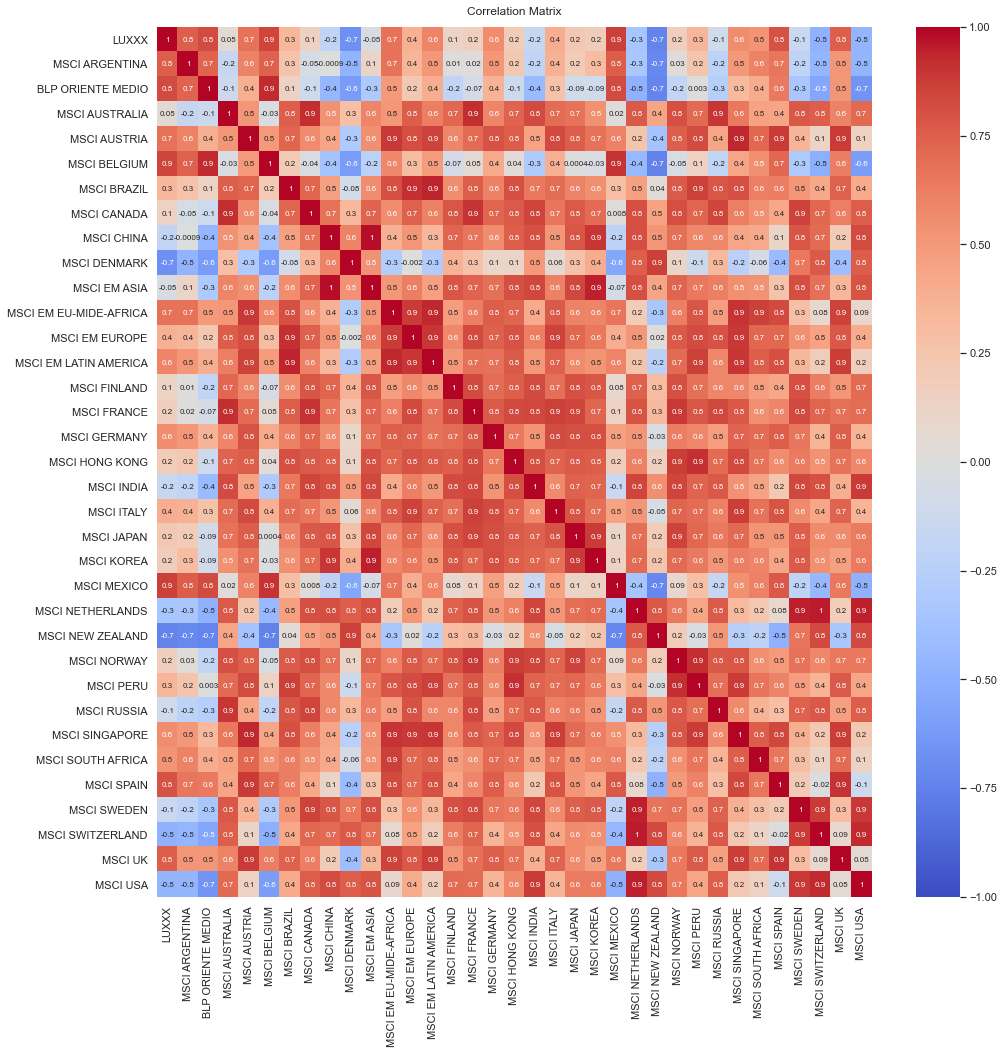

In [21]:
heat_map(df, method='pearson', color="coolwarm", title='Correlation Matrix')

**Unsupervised Learning: Clustering**

Calculate the Euclidean distance matrix for all 35 series

* In order to calculate the Euclidean distance we import euclidean_distances function from sklearn:

In [22]:
from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances(df.T, df.T)
np.round(distance,2)[0]

array([     0.  ,  20596.87,  25558.66,   5925.97,  21402.8 ,  21983.53,
         7978.07,   9145.24,  22245.36, 112463.28,  15560.73,  19526.14,
        18656.9 ,  17318.25,  21529.19,  21153.78,  21176.4 , 203930.47,
         6310.31,  22560.01,   8961.23,  13393.31,  54913.4 ,  21236.1 ,
        21208.11,  20785.57,   4764.61,  14310.25,   4067.07,   3685.51,
        21743.92, 174450.87,   6306.54,   9167.21,  18980.68])

Run a k-means cluster on the 35 return series

In [23]:
kmeans = KMeans(n_clusters=17, init='k-means++', algorithm='auto',)
kmeans.fit(df.pct_change().dropna().T)

KMeans(n_clusters=17)

In [24]:
kmeans.cluster_centers_ # Final locations of the centroid

array([[-0.06205605, -0.02741944,  0.02966051, ...,  0.02348347,
        -0.00866813, -0.01152393],
       [-0.04857993, -0.0191742 ,  0.02907779, ...,  0.07377582,
         0.0065968 , -0.00570597],
       [-0.07496675, -0.04108695,  0.0357247 , ...,  0.03400571,
        -0.0332173 ,  0.03869289],
       ...,
       [-0.06210631, -0.03739302,  0.02360371, ...,  0.01192556,
        -0.00060396,  0.01203232],
       [-0.06612319, -0.03110629, -0.01827839, ...,  0.0236597 ,
        -0.01653357,  0.00447354],
       [-0.04479082, -0.05221435,  0.03609718, ...,  0.03428139,
         0.00616738, -0.02897313]])

In [25]:
kmeans.labels_

array([11,  1,  8,  5, 13,  0,  4,  5,  9, 16,  9,  7,  7,  4,  0,  0,  0,
        9,  5,  6, 15,  3, 10,  0, 12,  0,  2,  7,  3, 14,  6,  0,  0,  0,
        5])

In [26]:
kmeans.inertia_# The lowest SSE value

0.6224410413996675

In [27]:
kmeans.n_iter_ # The number of iterations required to converge

2

* Plotting:

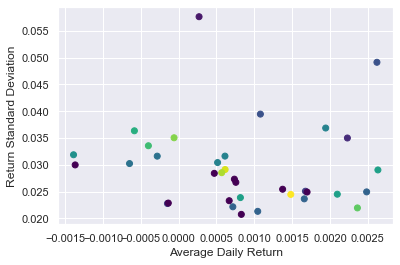

In [28]:
x = df.pct_change().dropna().mean()
y = df.pct_change().dropna().std()

plt.scatter(x, y, c = kmeans.labels_, marker='o',cmap='viridis')
plt.xlabel("Average Daily Return")
plt.ylabel("Return Standard Deviation")
plt.show()

Justify your choice of k

In [29]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 35):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df.pct_change().dropna().T)
    sse.append(kmeans.inertia_)

* Plot in order to find the elbow point:

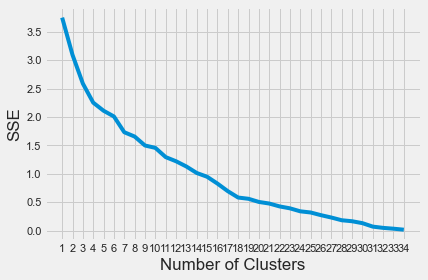

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 35), sse)
plt.xticks(range(1, 35))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* Seems the optimal k = 17, however, it`s not obvious based on the graph.


* So, We will also use the KneeLocator function to find the optimal k:

In [31]:
kl = KneeLocator(range(1, 35), sse, curve="convex", direction="decreasing")
print("The optimal k is:", kl.elbow)

The optimal k is: 17


Normalize each data series. Subtract each series by the weighted average from part 2.4.  Then divide this difference by the weighted volatility from part 3.4

* Here, we subtract our weighted average returns series from each data series and then divide by our weighted uncoditional volatility.

In [32]:
normalized_data = (df.pct_change() - df.pct_change().mean()*0.5)/(unconditional_volatility_.mean()*0.5)
normalized_data.dropna()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
8-Jan-16,-0.040289,-0.027524,-0.038906,-0.033628,-0.047851,-0.031943,-0.046661,-0.026482,-0.046727,-0.025725,...,-0.039183,-0.042986,-0.023834,-0.026244,-0.035251,-0.038386,-0.038272,-0.036184,-0.029914,-0.034845
15-Jan-16,-0.014843,-0.010910,-0.027571,-0.011541,-0.023818,-0.011158,-0.028854,-0.016360,-0.032702,-0.029920,...,-0.029285,-0.023844,-0.064030,-0.025377,-0.021288,-0.020291,-0.019291,-0.010370,-0.009663,-0.013755
22-Jan-16,-0.001199,0.016353,-0.032806,0.000079,0.013608,0.020183,-0.016648,0.014744,-0.005020,0.019976,...,0.020827,0.019554,0.037161,-0.009394,0.013175,0.011038,0.023621,0.010718,0.009112,0.007052
29-Jan-16,0.019968,0.044542,0.038703,0.011082,0.006741,0.013399,0.050543,0.019968,0.010081,0.011919,...,0.010555,0.059372,0.050947,0.010525,0.038350,0.005024,-0.002366,0.005377,0.018041,0.008566
5-Feb-16,-0.010161,0.003761,0.017772,-0.002809,-0.014672,-0.037006,0.013176,-0.004491,-0.014292,-0.043146,...,0.002270,0.004943,-0.018770,0.001607,-0.001428,-0.019410,-0.009751,-0.023646,-0.021461,-0.018827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,-0.034161,-0.021952,-0.016312,0.011838,-0.030200,-0.031923,-0.037406,-0.003161,-0.021974,-0.003724,...,-0.020389,-0.022133,-0.031037,-0.005964,-0.014047,-0.023088,-0.015579,-0.015620,-0.015964,-0.003669
2-Oct-20,0.028048,0.021610,0.003767,-0.018852,-0.000382,0.012363,-0.024324,0.003382,0.013683,0.013156,...,0.003519,0.004127,-0.012215,0.006802,0.016990,0.011131,0.009865,0.002549,0.005763,0.008537
9-Oct-20,0.021063,0.041607,-0.012420,0.029258,0.034094,0.029064,0.033522,0.012154,0.021579,0.018950,...,0.010245,0.018583,0.010104,0.006322,0.006577,0.017634,0.009369,0.002705,0.010063,0.021367


Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

In [33]:
distance_normalized = euclidean_distances(normalized_data.dropna().T, normalized_data.dropna().T)
np.round(distance_normalized,2)[0]

array([0.  , 0.5 , 0.32, 0.26, 0.23, 0.25, 0.38, 0.23, 0.27, 0.29, 0.24,
       0.26, 0.26, 0.3 , 0.24, 0.21, 0.22, 0.25, 0.26, 0.25, 0.26, 0.24,
       0.29, 0.23, 0.31, 0.24, 0.3 , 0.31, 0.23, 0.27, 0.22, 0.23, 0.26,
       0.23, 0.24])

Using the normalized data series, run a k-means cluster on the 35 transformed variables

In [34]:
kmeans_normalized = KMeans(n_clusters=17, init='k-means++', algorithm='auto',)
kmeans_normalized.fit(normalized_data.dropna().T)

KMeans(n_clusters=17)

In [35]:
kmeans_normalized.cluster_centers_ # Final locations of the centroid

array([[-0.03275176, -0.01980951,  0.01515846, ...,  0.01049085,
        -0.00424425, -0.00808053],
       [-0.02752371, -0.01090957,  0.01635265, ...,  0.0416069 ,
         0.00365097, -0.00330006],
       [-0.02482367, -0.01874437, -0.00969002, ...,  0.01217897,
        -0.00552162,  0.00314515],
       ...,
       [-0.03753293, -0.0177485 , -0.01050077, ...,  0.01319411,
        -0.00951496,  0.002354  ],
       [-0.0109164 ,  0.00057494, -0.00919818, ...,  0.0191688 ,
         0.00235816, -0.000897  ],
       [-0.035282  , -0.01525486,  0.0181241 , ...,  0.01582984,
        -0.00424246, -0.00741427]])

In [36]:
kmeans_normalized.labels_

array([11,  1,  4,  9, 13, 16,  3,  9,  6,  0,  6,  8, 12,  3, 16, 16, 16,
        2,  9,  5, 14,  2, 10, 16, 15,  0,  7, 12,  2,  8,  5, 16,  0,  0,
        9])

In [37]:
kmeans_normalized.inertia_# The lowest SSE value

0.19662890187521517

In [38]:
kmeans_normalized.n_iter_ # The number of iterations required to converge

2

* Plotting:

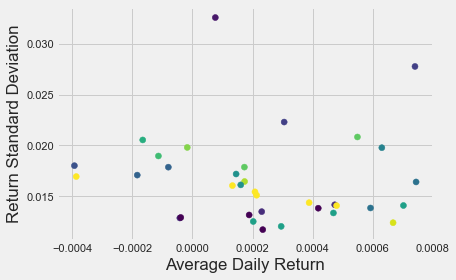

In [39]:
x = normalized_data.dropna().mean()
y = normalized_data.dropna().std()

plt.scatter(x, y, c = kmeans_normalized.labels_, marker='o',cmap='viridis')
plt.xlabel("Average Daily Return")
plt.ylabel("Return Standard Deviation")
plt.show()

Justify your choice of k

In [40]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse_normalized = []
for k in range(1, 35):
    kmeans_normalized = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_normalized.fit(normalized_data.dropna().T)
    sse_normalized.append(kmeans_normalized.inertia_)

* Plot in order to find the elbow point:

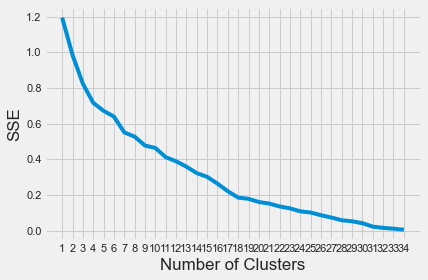

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 35), sse_normalized)
plt.xticks(range(1, 35))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* Seems the optimal k = 17, however, it`s not obvious based on the graph.


* So, We will also use the KneeLocator function to find the optimal k:

In [42]:
k_normalized = KneeLocator(range(1, 35), sse_normalized, curve="convex", direction="decreasing")
print("The optimal k is:", k_normalized.elbow)

The optimal k is: 17


Were the 2 k values the same?

* Yes they are the same, both k = 17.

Did the grouping of the series change as a result of your normalization?

* Yes, as we can see on the plots above and based on the labels it did change.

**Data Selection**

Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  You may choose the same one that your group used in the previous assignment.

* We choose: MSCI USA. 

Splitting the data into testing and training, with 2/3 for training and 1/3 for testing:

In [43]:
X, y = df.drop('MSCI USA',axis=1), df['MSCI USA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

The goal is to explain (not predict) the value of your response at time t, given the other 34 variables at time t.  DO NOT USE the response at time T + 1.  

**Compare unsupervised and supervised**

What is the difference between unsupervised learning and supervised learning?

* For Supervised learning, we need to train the model using labeled data.
* Unsupervised models cluster the unlabeled data, and these models find hidden patters in the data.

Which is clustering?  Which is CART?  Which is SVM?

* Clustering is unsupervised.
* CART is supervised.
* SVM is supervised.

**Compare and Contrast CART and SVM**

What do the CART and SVM have in common?  Be specific as to how they cut the dimensional space

* CARTs and SVMs divides/separates the data using hyper-plane or line.
* Using a separating hyper-plane or line in order to separate the classes. SVM creates an optimal hyper-plane or line which maximizes the distance to the nearest points in either class and minimizes the errors.

How do the CART and SVM methodologies differ?

* SVM uses the kernel trick to turn a linearly not separable problem problem into a linearly separable one, on the other hand decision trees can split the data into hyper-rectangles according to the target. 
* When it comes to CARTs, the tree is build based on a question. One of the benefit of decision trees, there is no assumption on the distribution of data.

**Classification and Regression Trees (CART)**

Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable depth of the tree, basing your result on cross-validation

* Creating trainging and test data for the Classification Tree:

In [44]:
X_tree, y_tree = df.drop('MSCI USA',axis=1).pct_change().dropna(), df['MSCI USA'].pct_change().dropna()

* Assigning Boolean values for the response variable:

In [45]:
y_tree_booloean = []
for idx in range(0, len(y_tree)):
    if y_tree[idx - 1] > y_tree[idx]:
        y_tree_booloean.append(True)
    else:
        y_tree_booloean.append(False)

* Splitting the data into testing and training, with 2/3 for training and 1/3 for testing:

In [46]:
X_train_tree,X_test_tree,y_train_tree,y_test_tree=train_test_split(X_tree,y_tree_booloean,test_size=1/3,random_state=42)

* Running Classification Tree

* First we use the GridSearchCV method to find the best parameters for our Classification Tree:

In [47]:
param_grid_tree = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
              'criterion' :['gini', 'entropy']
             }
tree_class = tree.DecisionTreeClassifier(random_state=1024)
grid_search_tree = GridSearchCV(estimator=tree_class, param_grid=param_grid_tree, cv=5, verbose=True)
grid_search_tree.fit(X_train_tree, y_train_tree)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    8.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [48]:
print("The best parameters are:",grid_search_tree.best_estimator_)

The best parameters are: DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                       max_features='auto', random_state=1024)


* Fitting and predicting:

In [49]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                                  max_features='auto', random_state=1024)
clf_fit = clf.fit(X_train_tree, y_train_tree)
clf_predict = clf.predict(X_test_tree)

* Evalutating the model:

In [50]:
print(confusion_matrix(y_test_tree, clf_predict))
print(classification_report(y_test_tree, clf_predict))

[[23 17]
 [24 20]]
              precision    recall  f1-score   support

       False       0.49      0.57      0.53        40
        True       0.54      0.45      0.49        44

    accuracy                           0.51        84
   macro avg       0.51      0.51      0.51        84
weighted avg       0.52      0.51      0.51        84



Perform a Regression Tree.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

* First we use the GridSearchCV method to find the best parameters for our Regression Tree:

In [51]:
param_grid_regression = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
              'criterion' :['mse', 'friedman_mse']}
tree_regression = tree.DecisionTreeRegressor(random_state=1024)
grid_search_regression = GridSearchCV(estimator=tree_regression, param_grid=param_grid_regression, cv=5, verbose=True)
grid_search_regression.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    7.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [52]:
print("The best parameters are:",grid_search_regression.best_estimator_)

The best parameters are: DecisionTreeRegressor(ccp_alpha=0.1, max_depth=6, max_features='auto',
                      random_state=1024)


In [53]:
grid_search_regression.best_score_

0.9678560171178645

* Fitting and predicting:

In [54]:
regression_model = tree.DecisionTreeRegressor(ccp_alpha=0.01, criterion='friedman_mse', max_depth=7,
                      max_features='auto', random_state=1024)
regression_model.fit(X_train,y_train)
predicted_regression = regression_model.predict(X_test)

* Evalutating the model:

In [55]:
print("Coefficient of determination of the prediction:",regression_model.score(X_test, y_test))

Coefficient of determination of the prediction: 0.9519194374204687


Which performed better, the classification or the regression tree?

Based on the evaluating scores, it seems that the regression tree perfomed better, as the Coefficient of determination of the prediction is 95%, meanwhile the classification tree`s accuracy is 51%, so the classification tree is being right 50% of the time, we cannot consider this a good model so we would prefer the regression tree.

**Support Vector Machines (SVM)**

Instead of running a regression tree, use SVM.  Use the original space of 35 variables
* We also did run a Support Vector Regression, but we got very low score values therefore we found that model useless, 
* So we go with two Support Vector Classification method, which we will compare at the end.

* Creating a pipeline:

In [56]:
# Create the 'steps' variable with the pipeline functions
steps = [('scaler', StandardScaler()), ('svc', SVC())]
# Pass the 'steps' to the Pipeline function
pipeline = Pipeline(steps)
# Test variables for 'c' and 'g'
c = [10, 100, 1000, 10000]
g = [1e-2, 1e-1, 1e0]

parameters = {'svc__C': c,
              'svc__gamma': g,
              'svc__kernel': ['rbf', 'linear', 'poly']}

* Running the RandomizedSearchCV function to find the optimal parameters:

In [57]:
rcv = RandomizedSearchCV(pipeline, parameters, cv=TimeSeriesSplit(n_splits=2))
rcv.fit(X_train_tree,y_train_tree)

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [10, 100, 1000, 10000],
                                        'svc__gamma': [0.01, 0.1, 1.0],
                                        'svc__kernel': ['rbf', 'linear',
                                                        'poly']})

* The optimal parameters:

In [58]:
# Call the 'best_params_' method to obtain the best parameters of C
best_C = rcv.best_params_['svc__C']

# Call the 'best_params_' method to obtain the best parameters of kernel
best_kernel = rcv.best_params_['svc__kernel']

# Call the 'best_params_' method to obtain the best parameters of gamma
best_gamma = rcv.best_params_['svc__gamma']

In [59]:
print("The best parameters are:",rcv.best_estimator_)
print("The best Kernel is:",best_kernel)

The best parameters are: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.01, kernel='poly'))])
The best Kernel is: poly


* Fitting and and predicting:

In [66]:
# Create a new SVC classifier
cls = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
# Instantiate the StandardScaler
ss1 = StandardScaler()
# Pass the scaled train data to the SVC classifier
cls.fit(ss1.fit_transform(X_train_tree),y_train_tree)
y_pred = cls.predict(ss1.transform(X_test_tree))

* Evalutating the model:

In [67]:
print("Accuracy, how often is the classifier correct:",metrics.accuracy_score(y_test_tree, y_pred))
print("Precision, percentage of positive tuples are labeled as such:",metrics.precision_score(y_test_tree, y_pred))
print("Recall, what percentage of positive tuples are labelled as such:",metrics.recall_score(y_test_tree, y_pred))

Accuracy, how often is the classifier correct: 0.6547619047619048
Precision, percentage of positive tuples are labeled as such: 0.6086956521739131
Recall, what percentage of positive tuples are labelled as such: 0.9545454545454546


In [68]:
print(confusion_matrix(y_test_tree, y_pred))
print(classification_report(y_test_tree, y_pred))

[[13 27]
 [ 2 42]]
              precision    recall  f1-score   support

       False       0.87      0.33      0.47        40
        True       0.61      0.95      0.74        44

    accuracy                           0.65        84
   macro avg       0.74      0.64      0.61        84
weighted avg       0.73      0.65      0.61        84



Choose a kernel.  Rerun the SVM.

* We choose here the rbf kernel, the previous model using poly kernel.

* Fitting and predicting:

In [63]:
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(ss1.fit_transform(X_train_tree),y_train_tree)
clf_y_pred = clf_svm.predict(ss1.transform(X_test_tree)) 

* Evalutating the model:

In [64]:
print("Accuracy, how often is the classifier correct:",metrics.accuracy_score(y_test_tree, clf_y_pred))

Accuracy, how often is the classifier correct: 0.5595238095238095


In [65]:
print(confusion_matrix(y_test_tree, clf_y_pred))
print(classification_report(y_test_tree, clf_y_pred))

[[19 21]
 [16 28]]
              precision    recall  f1-score   support

       False       0.54      0.47      0.51        40
        True       0.57      0.64      0.60        44

    accuracy                           0.56        84
   macro avg       0.56      0.56      0.55        84
weighted avg       0.56      0.56      0.56        84



Compare the results of the 2 SVMs.  Comment on how well the data is linearly separable.

As, we run one SVM using the RandomizedSearchCV function, which choose the **poly** kernel, for that the accuracy is 65% then we run another SVM usning **rbf** kernel, wihtour specifing the C & the gamma, for this model we got accuracy 59%, so it seems our first SVM performed better. 